In [13]:
import os
import pickle
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
def load_pickle_files(folder_path):
    pickle_dict = {}
    for filename in os.listdir(folder_path):
        if filename.endswith('.p'):
            year = filename[-6:-2]
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'rb') as file:
                data = pickle.load(file)
            pickle_dict[year] = data
    return pickle_dict

def compute_summary_statistics(graphs):
    summary_stats = []
    for year, graph in graphs.items():
        stats = {
            'Year': year,
            'Nodes': graph.number_of_nodes(),
            'Edges': graph.number_of_edges()
        }
        summary_stats.append(stats)
    return summary_stats

def save_summary_statistics(summary_stats, filename):
    df_stats = pd.DataFrame(summary_stats)
    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=df_stats.values, colLabels=df_stats.columns, loc='center')
    plt.savefig(filename)

def compute_centrality_measures(graphs):
    centrality_data = []
    for year, graph in graphs.items():
        degree = dict(graph.degree())
        closeness = nx.closeness_centrality(graph)
        betweenness = nx.betweenness_centrality(graph)
        try:
            eigenvector = nx.eigenvector_centrality_numpy(graph)
        except:
            eigenvector = {node: 0 for node in graph.nodes()}  # Handle graphs where eigenvector centrality computation fails

        for node in graph.nodes():
            centrality_data.append({
                'Year': year,
                'Node': node,
                'Degree': degree.get(node, 0),
                'Closeness': closeness.get(node, 0),
                'Betweenness': betweenness.get(node, 0),
                'Eigenvector': eigenvector.get(node, 0)
            })
    return centrality_data

def plot_centrality_measures(df_centrality, filename):
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    measures = ['Degree', 'Closeness', 'Betweenness', 'Eigenvector']
    for i, row in enumerate(measures):
        for j, col in enumerate(measures):
            ax = axes[i, j]
            if i == j:
                ax.hist(df_centrality[col].dropna(), bins=15, color='blue', alpha=0.7)
                ax.set_title(f'{col} Histogram')
            else:
                ax.scatter(df_centrality[col], df_centrality[row], alpha=0.5)
                ax.set_xlabel(col)
                ax.set_ylabel(row)
    plt.savefig(filename)
    plt.show()

def main(folder_path):
    graphs_by_year = load_pickle_files(folder_path)
    
    # Compute and save summary statistics
    summary_stats = compute_summary_statistics(graphs_by_year)
    save_summary_statistics(summary_stats, "../Outputs/summary_stats.png")
    
    # Compute centrality measures
    centrality_data = compute_centrality_measures(graphs_by_year)
    df_centrality = pd.DataFrame(centrality_data)
    
    # Plot and save centrality measures
    plot_centrality_measures(df_centrality, "../Outputs/centrality_scatter_matrix.png")



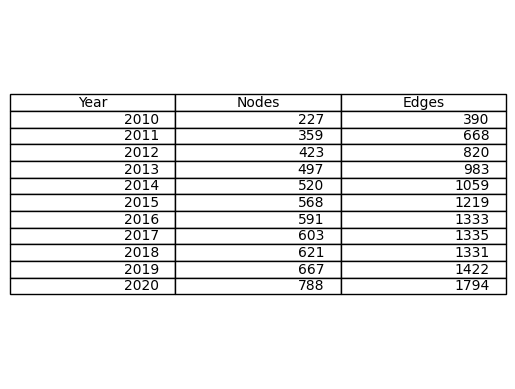

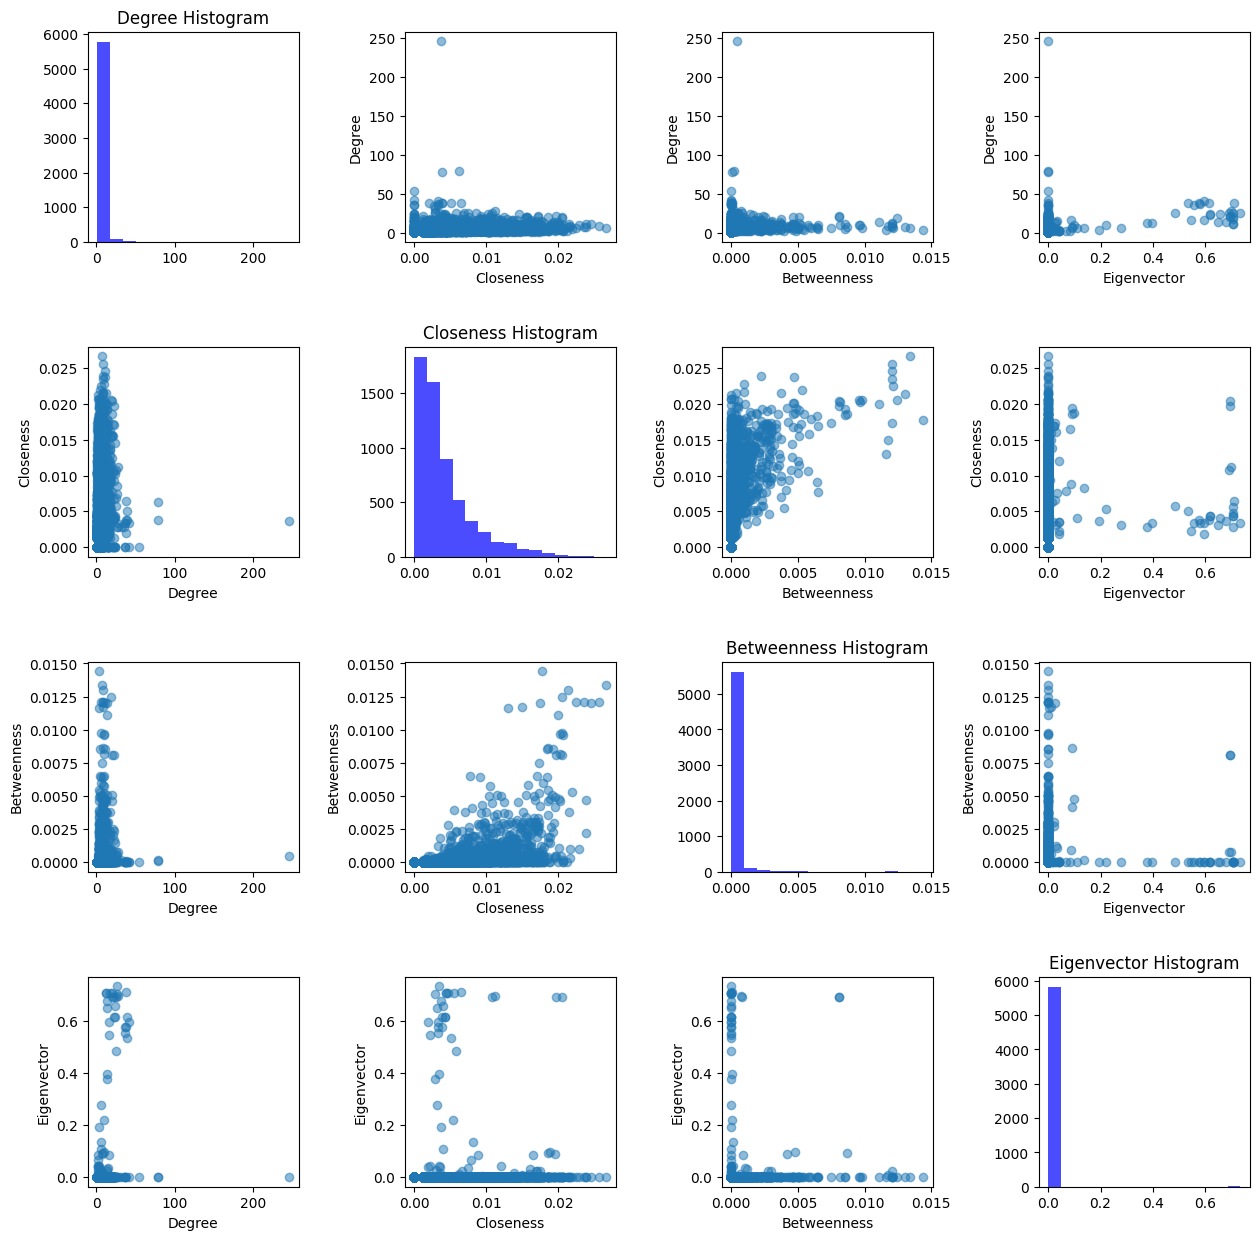

In [19]:
# Example usage
folder_path = '../Pickle Graphs/'
main(folder_path)